Status Code: 200

TASK 1 COMPLETED: Dataset created successfully!
Saved as: quotes_custom_dataset.csv



,Quote,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"



           EDA BEGINS

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Quote   10 non-null     object
 1   Author  10 non-null     object
 2   Tags    10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes
None

Preview after adding extra columns:


,Quote,Author,Tags,Quote_Length,Tags_List,Tag_Count
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world",115,"[change, deep-thoughts, thinking, world]",4
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices",85,"[abilities, choices]",2
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles",131,"[inspirational, life, live, miracle, miracles]",5
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor",104,"[aliteracy, books, classic, humor]",4
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational",111,"[be-yourself, inspirational]",2


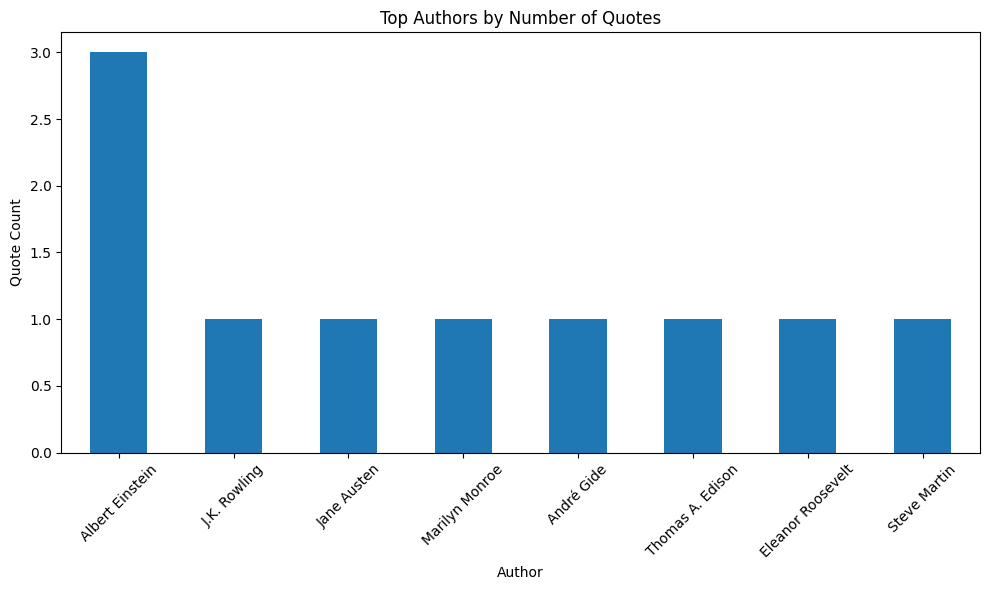

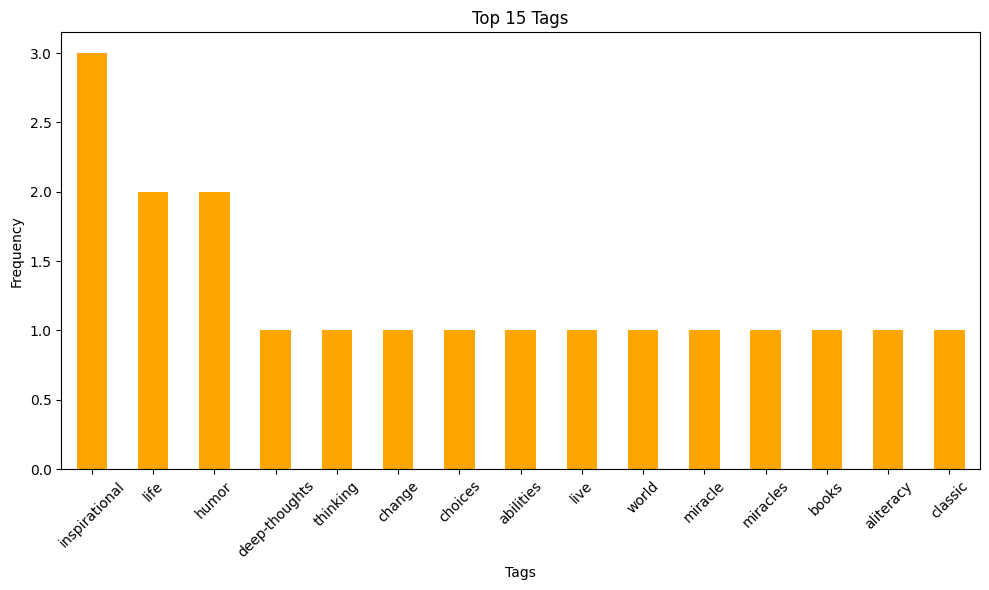

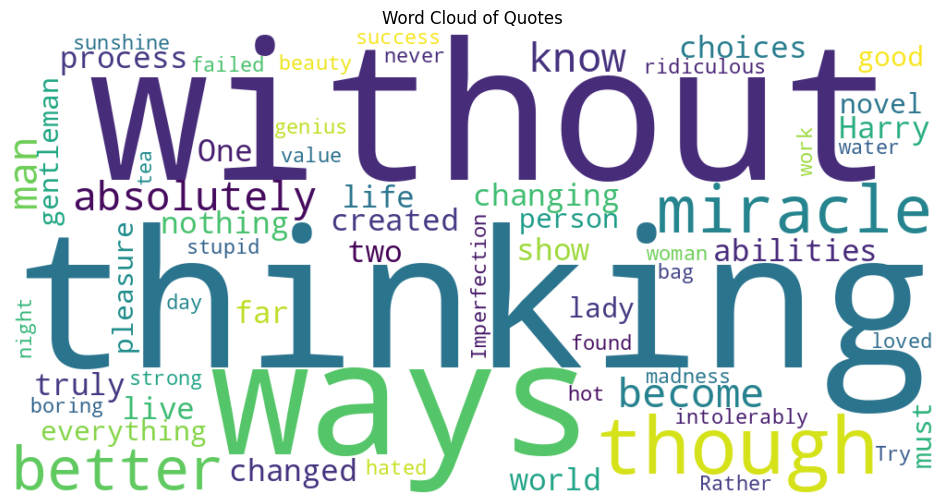

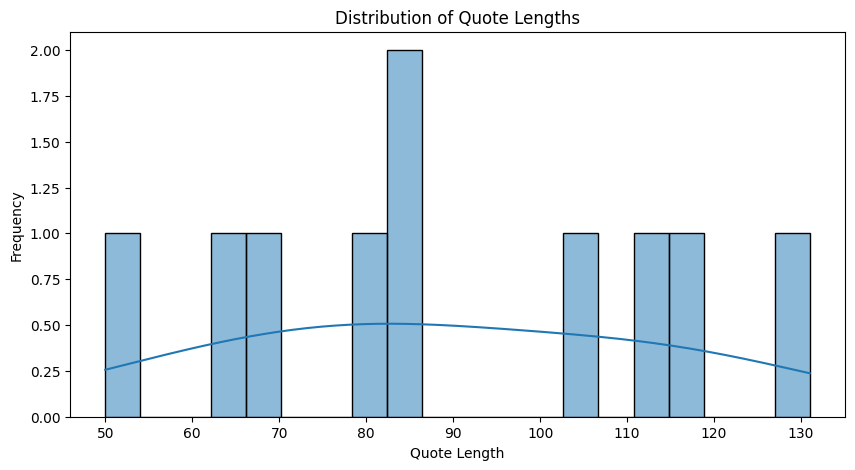

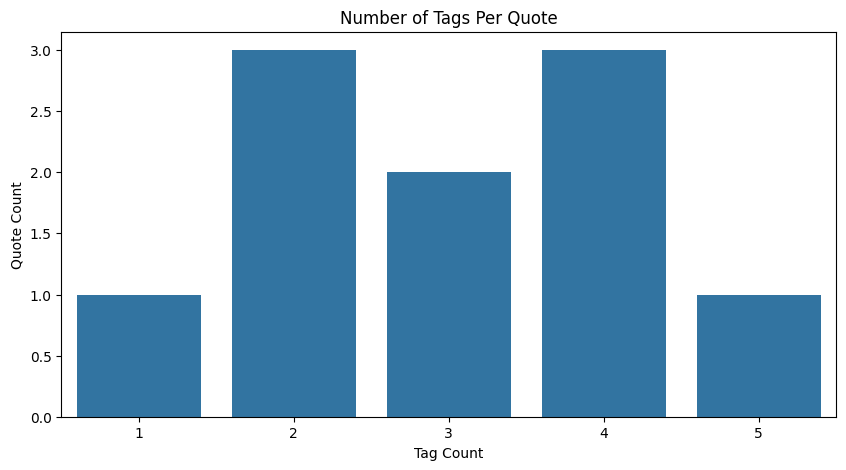


================ FINAL INSIGHTS ================
Total Quotes: 10
Total Unique Authors: 8

Top 5 Authors:
Author
Albert Einstein    3
J.K. Rowling       1
Jane Austen        1
Marilyn Monroe     1
André Gide         1
Name: count, dtype: int64

Most Common Tags:
inspirational    3
life             2
humor            2
deep-thoughts    1
thinking         1
change           1
choices          1
abilities        1
live             1
world            1
Name: count, dtype: int64

Quote Length Summary:
count     10.000000
mean      89.500000
std       25.404505
min       50.000000
25%       70.750000
50%       85.000000
75%      109.250000
max      131.000000
Name: Quote_Length, dtype: float64

Tag Count Summary:
count    10.000000
mean      3.000000
std       1.247219
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Tag_Count, dtype: float64

TASK 2 COMPLETED SUCCESSFULLY ✔


In [5]:


# Install dependencies
!pip install requests beautifulsoup4 pandas matplotlib seaborn wordcloud

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
url = "http://quotes.toscrape.com/"

response = requests.get(url)
print("Status Code:", response.status_code)

soup = BeautifulSoup(response.text, "html.parser")

quotes_data = []

quotes = soup.find_all("div", class_="quote")

for q in quotes:
    text = q.find("span", class_="text").get_text(strip=True)
    author = q.find("small", class_="author").get_text(strip=True)
    tags = [tag.get_text(strip=True) for tag in q.find_all("a", class_="tag")]

    quotes_data.append({
        "Quote": text,
        "Author": author,
        "Tags": ", ".join(tags)
    })

# Convert to DataFrame
df = pd.DataFrame(quotes_data)

# Save dataset
file_name = "quotes_custom_dataset.csv"
df.to_csv(file_name, index=False)

print("\nTASK 1 COMPLETED: Dataset created successfully!")
print(f"Saved as: {file_name}\n")
display(df.head())


# ==============================================================
#              TASK 2: EXPLORATORY DATA ANALYSIS (EDA)
# ==============================================================

print("\n==========================================")
print("           EDA BEGINS")
print("==========================================\n")

print("Dataset Info:")
print(df.info())

# Create additional columns
df["Quote_Length"] = df["Quote"].str.len()
df["Tags_List"] = df["Tags"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
df["Tag_Count"] = df["Tags_List"].apply(len)

print("\nPreview after adding extra columns:")
display(df.head())


# ==============================================================
#   Visualization 1: Top Authors by Quote Count
# ==============================================================

plt.figure(figsize=(10, 6))
df["Author"].value_counts().plot(kind="bar")
plt.title("Top Authors by Number of Quotes")
plt.xlabel("Author")
plt.ylabel("Quote Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==============================================================
#   Visualization 2: Most Common Tags
# ==============================================================

all_tags = [tag for tags in df["Tags_List"] for tag in tags]
tag_counts = pd.Series(all_tags).value_counts()

plt.figure(figsize=(10, 6))
tag_counts.head(15).plot(kind="bar", color="orange")
plt.title("Top 15 Tags")
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==============================================================
#   Visualization 3: Word Cloud of Quotes
# ==============================================================

all_quotes = " ".join(df["Quote"])
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(all_quotes)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Quotes")
plt.show()

# ==============================================================
#   Visualization 4: Quote Length Distribution
# ==============================================================

plt.figure(figsize=(10, 5))
sns.histplot(df["Quote_Length"], bins=20, kde=True)
plt.title("Distribution of Quote Lengths")
plt.xlabel("Quote Length")
plt.ylabel("Frequency")
plt.show()

# ==============================================================
#   Visualization 5: Tag Count Distribution
# ==============================================================

plt.figure(figsize=(10, 5))
sns.countplot(x=df["Tag_Count"])
plt.title("Number of Tags Per Quote")
plt.xlabel("Tag Count")
plt.ylabel("Quote Count")
plt.show()

# ==============================================================
#   Final EDA Insights
# ==============================================================

print("\n================ FINAL INSIGHTS ================")
print(f"Total Quotes: {len(df)}")
print(f"Total Unique Authors: {df['Author'].nunique()}")

print("\nTop 5 Authors:")
print(df["Author"].value_counts().head())

print("\nMost Common Tags:")
print(tag_counts.head(10))

print("\nQuote Length Summary:")
print(df["Quote_Length"].describe())

print("\nTag Count Summary:")
print(df["Tag_Count"].describe())

print("\nTASK 2 COMPLETED SUCCESSFULLY ✔")

